In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df
#Un comentario

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951384a710>]],
      dtype=object)

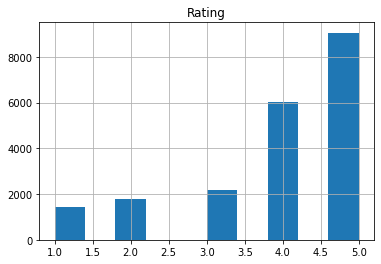

In [ ]:
df.hist(column='Rating')

#We will drop ratings with 5 stars and consider ratings with less than 4 stars to bring negative feedback. This
#is to assure a balanced training of the model. Otherwise our model would be biased.

In [ ]:
five_star_ratings_index = df.index[df['Rating']==5].tolist()
five_star_ratings_index

[3,
 4,
 5,
 6,
 8,
 9,
 17,
 18,
 20,
 21,
 23,
 37,
 48,
 49,
 50,
 52,
 53,
 55,
 57,
 58,
 59,
 61,
 62,
 63,
 66,
 72,
 73,
 75,
 81,
 82,
 86,
 91,
 102,
 107,
 108,
 111,
 114,
 116,
 117,
 121,
 123,
 125,
 127,
 147,
 148,
 149,
 151,
 152,
 157,
 161,
 184,
 185,
 198,
 203,
 212,
 213,
 218,
 220,
 221,
 222,
 223,
 225,
 227,
 228,
 229,
 232,
 240,
 244,
 246,
 247,
 266,
 267,
 270,
 271,
 272,
 278,
 279,
 286,
 287,
 288,
 298,
 301,
 303,
 304,
 305,
 307,
 313,
 314,
 316,
 319,
 324,
 329,
 350,
 351,
 353,
 355,
 356,
 358,
 360,
 361,
 362,
 371,
 373,
 385,
 386,
 388,
 392,
 396,
 398,
 400,
 401,
 406,
 408,
 410,
 414,
 418,
 421,
 425,
 434,
 436,
 438,
 441,
 443,
 444,
 446,
 447,
 449,
 454,
 462,
 465,
 466,
 473,
 474,
 476,
 478,
 493,
 498,
 499,
 504,
 508,
 511,
 516,
 517,
 520,
 521,
 525,
 526,
 528,
 530,
 532,
 533,
 540,
 541,
 545,
 549,
 560,
 567,
 568,
 570,
 580,
 581,
 582,
 585,
 588,
 597,
 598,
 599,
 602,
 607,
 608,
 609,
 612,
 613,


In [ ]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df = df.drop(index=five_star_ratings_index)
#Great! We are doing good so far.
df = df.reset_index()
df = df.drop(columns=['index'])
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"excellent staff, housekeeping quality hotel ch...",4
4,"poor value stayed monaco seattle july, nice ho...",2
...,...,...
11432,not impressed unfriendly staff checked asked h...,2
11433,great location price view hotel great quick pl...,4
11434,"ok just looks nice modern outside, desk staff ...",2
11435,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
NUMBER_OF_ROWS = df.shape[0]

In [ ]:
#Also let us add a sentiment column to our modified dataframe

df_sentiment = pd.DataFrame(data = np.zeros(NUMBER_OF_ROWS), columns=['Sentiment'],dtype='int64')

In [ ]:
df_sentiment

,Sentiment
0,0
1,0
2,0
3,0
4,0
...,...
11432,0
11433,0
11434,0
11435,0


In [ ]:
df_model = pd.concat([df,df_sentiment], axis = 1)
df_model

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"excellent staff, housekeeping quality hotel ch...",4,0
4,"poor value stayed monaco seattle july, nice ho...",2,0
...,...,...,...
11432,not impressed unfriendly staff checked asked h...,2,0
11433,great location price view hotel great quick pl...,4,0
11434,"ok just looks nice modern outside, desk staff ...",2,0
11435,hotel theft ruined vacation hotel opened sept ...,1,0


In [ ]:
#We need to update the sentiment. If rating is 4 sentiment will be positive = 1

for i in range(NUMBER_OF_ROWS):
  if df_model.at[i,'Rating']==4:
    df_model.at[i,'Sentiment']=1

In [ ]:
df_model #Great it looks like everything is set up!

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"excellent staff, housekeeping quality hotel ch...",4,1
4,"poor value stayed monaco seattle july, nice ho...",2,0
...,...,...,...
11432,not impressed unfriendly staff checked asked h...,2,0
11433,great location price view hotel great quick pl...,4,1
11434,"ok just looks nice modern outside, desk staff ...",2,0
11435,hotel theft ruined vacation hotel opened sept ...,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9513c75550>]],
      dtype=object)

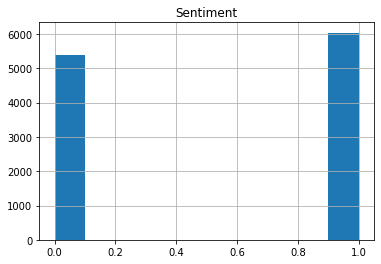

In [ ]:
df_model.hist(column='Sentiment')

In [ ]:
#So now we have a not so biased model! It will be a good model with enough instances of both types for training!

#We will perform essentially two ML projects. One to predict sentiment analysis and one to predict rating.

In [ ]:
df_model.isnull().any().any() #no null values

False

In [ ]:
df_model.isna().sum()#no na values

Review       0
Rating       0
Sentiment    0
dtype: int64

In [ ]:
(df_model['Review']=='').sum() #no blank text

0

## We will visualize a bit what's inside the data: Pie charts

---



In [ ]:
rating_counts = df_model['Rating'].value_counts()
rating_counts

4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
size=[rating_counts.get(1), rating_counts.get(2),rating_counts.get(3), rating_counts.get(4)]

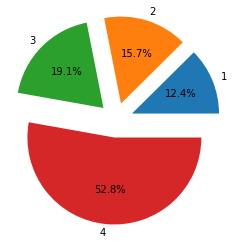

In [ ]:
plt.pie(size, labels=['1','2','3','4'], autopct='%1.1f%%', explode=[0.2,0.2,0.2,0.2])
plt.show()

In [ ]:
sentiment_counts = df_model['Sentiment'].value_counts()
sentiment_counts

1    6039
0    5398
Name: Sentiment, dtype: int64

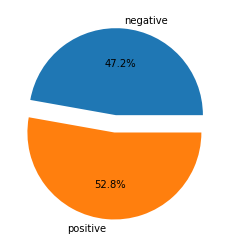

In [ ]:
size=[sentiment_counts.get(0), sentiment_counts.get(1)]
plt.pie(size, labels=['negative', 'positive'], autopct='%1.1f%%', explode=[0,0.2])
plt.show()

# Natural Language processing

## Text pre-processing

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
mag = 'We are creating a nice and interesting project. We will have a good mark'

word_tokenize(mag.lower())

['we',
 'are',
 'creating',
 'a',
 'nice',
 'and',
 'interesting',
 'project',
 '.',
 'we',
 'will',
 'have',
 'a',
 'good',
 'mark']

In [ ]:
#Delete stopwords

mag = 'We are creating a nice and interesting project. We will have a good mark'

words = word_tokenize(mag.lower())
stop_words = set(stopwords.words('english'))

filtered_words = []
for word in words:
    if word not in stop_words:
        filtered_words.append(word)
        
print(filtered_words)

['creating', 'nice', 'interesting', 'project', '.', 'good', 'mark']


In [ ]:
#delete stopwords + Stemming(we get the root of the words)

mag = 'We are creating a nice and interesting project. We will have a good mark'

words = word_tokenize(mag.lower())
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

filtered_words = []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
print(filtered_words)



#Thanks to stemming we will have the same node for words with the same root. For example interest and interested and interesting will represent the same node.

['creat', 'nice', 'interest', 'project', '.', 'good', 'mark']


In [ ]:
#we remove punctuation

mag = 'We are creating a nice and interesting project. We will have a good mark'

words = word_tokenize(mag.lower())
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

filtered_words = []
for word in words:
    if word not in stop_words and word.isalpha(): #(isalphabet)
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
print(filtered_words)

['creat', 'nice', 'interest', 'project', 'good', 'mark']


## Let us convert all this into a function

In [ ]:
def clean_review(review, stemmer = SnowballStemmer('english'), stop_words = set(stopwords.words('english'))):

  words = word_tokenize(review.lower())
  
  filtered_words = []
  for word in words:
      if word not in stop_words and word.isalpha(): #(isalphabet)
          stemmed_word = stemmer.stem(word)
          filtered_words.append(stemmed_word)
  return filtered_words

In [ ]:
clean_review('This is a really nice and interesting project. What do you think?')

['realli', 'nice', 'interest', 'project', 'think']

## Cleaning all reviews from the dataset

In [ ]:
df_model.Review

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        excellent staff, housekeeping quality hotel ch...
4        poor value stayed monaco seattle july, nice ho...
                               ...                        
11432    not impressed unfriendly staff checked asked h...
11433    great location price view hotel great quick pl...
11434    ok just looks nice modern outside, desk staff ...
11435    hotel theft ruined vacation hotel opened sept ...
11436    people talking, ca n't believe excellent ratin...
Name: Review, Length: 11437, dtype: object

In [ ]:
stemmed_nested_list = df_model.Review.apply(clean_review)
print(stemmed_nested_list)

0        [nice, hotel, expens, park, got, good, deal, s...
1        [ok, noth, special, charg, diamond, member, hi...
2        [nice, room, experi, hotel, monaco, seattl, go...
3        [excel, staff, housekeep, qualiti, hotel, choc...
4        [poor, valu, stay, monaco, seattl, juli, nice,...
                               ...                        
11432    [impress, unfriend, staff, check, ask, higher,...
11433    [great, locat, price, view, hotel, great, quic...
11434    [ok, look, nice, modern, outsid, desk, staff, ...
11435    [hotel, theft, ruin, vacat, hotel, open, sept,...
11436    [peopl, talk, ca, believ, excel, rate, hotel, ...
Name: Review, Length: 11437, dtype: object


In [ ]:
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]
unique_words = pd.Series(flat_stemmed_list).value_counts()
NUMBER_OF_UNIQUE_WORDs = len(unique_words)
print('Number of unique words:',len(unique_words))

Number of unique words: 25596


In [ ]:
unique_words[:10]

room     29458
hotel    29143
stay     15380
good     11324
great    10468
night     8677
staff     8408
nice      8318
day       7906
locat     7646
dtype: int64

In [ ]:
#Create an ID for every unique word. We create our vocabulary.

dictionary = {}

for i in range(NUMBER_OF_UNIQUE_WORDs):
  dictionary[unique_words.index[i]]=i

In [ ]:
NUMBER_OF_ROWS = NUMBER_OF_ROWS #number of reviews

NUMBER_OF_COLS = NUMBER_OF_UNIQUE_WORDs #number of unique words
df_words = pd.DataFrame(np.zeros((NUMBER_OF_ROWS, NUMBER_OF_COLS)),dtype ='int64')

df_words

,0,1,2,3,4,5,6,7,8,9,...,25586,25587,25588,25589,25590,25591,25592,25593,25594,25595
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#We convert the words in stemmed nested list to its word ID

stemmed_nested_list = stemmed_nested_list.tolist()
stemmed_nested_list_IDs = []

for sublista in stemmed_nested_list:
  sublista_ID=[]
  for elemento in sublista:
    sublista_ID.append(dictionary[elemento])
  stemmed_nested_list_IDs.append(sublista_ID)

stemmed_nested_list_IDs[0:3]

#Ok, everything is working!


[[7,
  1,
  163,
  86,
  28,
  3,
  192,
  2,
  1,
  1073,
  53,
  209,
  187,
  110,
  732,
  376,
  50,
  631,
  86,
  42,
  248,
  190,
  32,
  146,
  46,
  0,
  0,
  12,
  7,
  150,
  22,
  69,
  1501,
  3755,
  3365,
  132,
  415,
  1851,
  14,
  420,
  405,
  0,
  5,
  87,
  401,
  1341,
  79,
  92,
  73,
  299,
  24,
  403,
  655,
  381,
  289,
  1395,
  2808,
  312,
  1291,
  7,
  5442,
  2,
  7,
  497,
  451,
  946,
  2,
  795,
  9,
  4,
  18,
  244,
  84,
  127,
  7,
  95,
  104,
  86,
  5],
 [139,
  125,
  328,
  138,
  1339,
  514,
  482,
  285,
  773,
  1779,
  1073,
  511,
  182,
  31,
  133,
  170,
  177,
  363,
  1896,
  133,
  434,
  35,
  175,
  1,
  0,
  110,
  1107,
  96,
  47,
  294,
  99,
  52,
  14,
  183,
  1325,
  3523,
  47,
  808,
  77,
  668,
  618,
  133,
  1896,
  2963,
  363,
  977,
  82,
  20,
  28,
  149,
  1548,
  133,
  267,
  0,
  35,
  434,
  1175,
  2963,
  124,
  133,
  8,
  2,
  116,
  1012,
  2852,
  912,
  936,
  2963,
  574,
  101,
  363,
  62

In [ ]:
row = 0
for lista in stemmed_nested_list_IDs:
  for elemento in lista:
    df_words.at[row,elemento] =1
  row+=1

In [ ]:
df_words #notice how most popular words appear usually

,0,1,2,3,4,5,6,7,8,9,...,25586,25587,25588,25589,25590,25591,25592,25593,25594,25595
0,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11433,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11434,1,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11435,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Next we will construct our data frames for ML. For sentiment and rating prediction respectively

In [ ]:
df_model_sentiment = pd.concat([df_model.loc[:,['Sentiment']],df_words], axis = 1)

In [ ]:
df_model_sentiment_reduced = df_model_sentiment.sample(n=3000, axis=0)
df_model_sentiment_reduced = df_model_sentiment_reduced.iloc[:, :1000]

In [ ]:
from google.colab import files

df_model_sentiment_reduced.to_csv('sentiment_reduced.csv', encoding = 'utf-8-sig') 
files.download('sentiment_reduced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_model_rating = pd.concat([df_model.loc[:,['Rating']],df_words], axis = 1)
df_model_rating

,Rating,0,1,2,3,4,5,6,7,8,...,25586,25587,25588,25589,25590,25591,25592,25593,25594,25595
0,4,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,2,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11433,4,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11434,2,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11435,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_model_rating_reduced = df_model_rating.sample(n=3000, axis=0)
df_model_rating_reduced = df_model_rating_reduced.iloc[:, :1000]

In [ ]:
df_model_rating_reduced

,Rating,0,1,2,3,4,5,6,7,8,...,989,990,991,992,993,994,995,996,997,998
240,2,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4647,4,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10466,2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,4,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9378,4,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,4,1,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11383,4,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7072,4,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
727,3,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import files

df_model_rating_reduced.to_csv('rating_reduced.csv', encoding = 'utf-8-sig') 
files.download('rating_reduced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Split for training and testing**

In [ ]:
X = df_model_rating_reduced.drop(['Rating'], axis = 1)
y = df_model_rating_reduced['Rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

In [ ]:
# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')